In [2]:
import requests
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from typing import Tuple

In [3]:
def visualize_iamge(image_b64):
    if image_b64.startswith("data:"):
        image_b64 = image_b64.split(",")[1]
    image_bytes = base64.b64decode(image_b64)
    image = Image.open(BytesIO(image_bytes))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_base64_encoded_image(image_url: str) -> Tuple[str, str]:
    """
    Fetch an image from a URL and return its base64 encoding and media type.

    Args:
        image_url: URL of the image.

    Returns:
        Tuple of (base64 string, media type, e.g., 'image/png', 'image/jpeg').
    """
    response = requests.get(image_url)
    response.raise_for_status()
    
    # Get media type from response headers
    media_type = response.headers.get("Content-Type", "application/octet-stream")
    
    # Encode image to base64
    image_data = response.content
    base64_image = base64.b64encode(image_data).decode("utf-8")
    
    # Optional sanity check
    assert base64.b64decode(base64_image) == image_data

    output_format = f"data:{media_type};base64,{base64_image}"
    
    return output_format


In [4]:

def extract_media_type_and_bytes(data_uri: str) -> Tuple[str, bytes]:
    """
    Extracts the media type and image bytes from a base64 data URI.

    Args:
        data_uri: string like "data:image/jpeg;base64,<image-base64>"

    Returns:
        Tuple of (media_type, image_bytes)
    """
    if not data_uri.startswith("data:"):
        raise ValueError("Invalid data URI format")

    # Split header and base64 part
    header, b64_data = data_uri.split(",", 1)

    # Extract media type
    # Example header: "data:image/jpeg;base64"
    media_type = header.split(";")[0][5:]  # remove "data:"

    # Decode base64 to bytes
    image_bytes = base64.b64decode(b64_data)

    return image_bytes, media_type

In [5]:
instructions = ["میتونی دراور چهار کشو (کد D14) رو بهم کمک کنی پیدا کنم؟",
                'کمترین قیمت ست سطل و جای دستمال لالیپاپ مدل رنگین کمان چنده؟',
                "لطفاً دراور چهار کشو (کد D14) را برای من تهیه کنید.",
                "عرض پارچه تریکو جودون 1/30 لاکرا گردباف نوریس به رنگ زرد طلایی چقدر است؟",
                "کمترین قیمت در این پایه برای گیاه طبیعی بلک گلد بنسای نارگل کد ۰۱۰۸ چقدر است؟",
                "کدام یک از این ماگ‌های خرید ماگ-لیوان هندوانه فانتزی و کارتونی کد 1375 یا ماگ لته خوری سرامیکی با زیره کد 741 دارای سبک کارتونی و فانتزی بوده و برای کودکان یا نوجوانان مناسب‌تر است؟",
                "قیمت متوسط خردکن سیلور کرست مدل NF-1923 تیغه تیتانیومی در شهر قم چقدر است؟",
                """محصول \'لحاف کرسی دست دوز ترمه طرح نسترن رنگ زرشکی\' با شناسه "iushix" و \'لحاف کرسی دست دوز ترمه آبی طرح نسترن کد 119807 Lahaf\' از نظر در دسترس بودن گارانتی در شهرهای مختلف را مقایسه کنید. کدام یک گزینه بهتری است؟""",
                "من به پایه دیواری مدلی برایت F3010 که مناسب تلویزیون\u200cهای سایز ۱۷ تا ۵۵ اینچ باشد، نیاز دارم.'",
                "سلام. لطفاً پاف نیمکت انتظار سه نفره با ستون\u200cبندی اسفنج مبلی و رنگ\u200cبندی مختلف را که امکان ارسال به سراسر ایران دارد، برای من تهیه کنید. متشکرم.",
                'میز جلو مبلی اسمردیس مدل J131 از چه موادی ساخته شده است؟',
                'لطفاً درباره ظرفیت ماگ سرامیکی دسته رنگی طرح نشانگر سوخت – Coffee Fuel Gauge – اطلاعات بیشتری بدهید و بفرمایید که این ماگ چه ظرفیتی دارد؟',
                'سلام! من دنبال یه گیاه بونسای هستم که خیلی خاص و زیبا باشه. می\u200cخوام برای هدیه دادن استفاده کنم و بهتره که ارسال گل رایگان هم داشته باشه. قیمتش هم حدوداً بین ۳,۷۰۰,۰۰۰ تا ۴,۱۰۰,۰۰۰ تومان باشه. می\u200cتونید کمکم کنید؟',
                'در مقایسه بین "چرخ خیاطی ژانومه دیجیتال (۱۲مدل دوخت) جا دکمه اتومات مدلSchone" و "چرخ خیاطی ژانومه مدل Juki 9800 اتوماتیک" کدامیک از نظر قیمت متوسط در مشهد بهتر است؟',

                'سلام، من به دنبال خرید ساعت دیواری مدرن فلزی سایز 60 مدل 122 هستم. (پس کرایه) اگر موجود دارید لطفا راهنمایی کنید. ممنون.',
                'قیمت متوسط چای ساز بوش مدل PB-78TS ظرفیت ۲.۵ لیتر با کتری پیرکس در شهر قم چقدر است؟',
                'آیا میز بار DBP99 از چه جنسی ساخته شده است؟',
                'در مقایسه بین "چرخ خیاطی ژانومه دیجیتال (۱۲مدل دوخت) جا دکمه اتومات مدلSchone" و "چرخ خیاطی ژانومه مدل Juki 9800 اتوماتیک" کدامیک از نظر قیمت متوسط در مشهد بهتر است؟',
                'کدامیک از محصولات \'دراور فایل کمدی پلاستیکی طرح کودک\' با شناسه "ebolgl" و \'دراور هوم کت ۴ طبقه بزرگ طرح دار از پلاستیک\' با شناسه "nihvhq" در فروشگاه\u200cهای بیشتری موجود است و آسان\u200cتر می\u200cتوان آن را خرید؟',
                'متوسط قیمت پکیج دیواری لورچ مدل آدنا ظرفیت ۳۲ هزار چقدر است؟',
                'غذاساز کنوود مدل FDP65: این محصول چند عضو دارد؟',               
]

instructions_new1 = [
    'در محصول تابلو معرق سنگ طبیعی سایز ۱.۶ متر طرح ۹، چند فروشگاه آن را با گارانتی عرضه می‌کنند؟',
    'این ست کابینت و روشویی دلفین مدل ZN-R13-W-6040 به همراه آینه و باکس دارای چند عضو است؟',
    'گوشت کوب برقی مولینکس مدل DD65J827 ظرفیت ۳ لیتر چند کاره: چند فروشگاه با ضمانت این محصول را عرضه می‌کنند؟',
    'تعداد فروشگاه‌های موجود در شهر تهران برای خرید اسپرسوساز اسمگ مدل ECF02 با ظرفیت ۱.۱ لیتر و رنگ آبی پاستیلی چقدر است؟',
    'چند فروشگاه این مبل یک نفره سناتور M 051 راحتیران را دارند؟',
    'این پایگاه کاغذ دیواری تیتانیوم طرح رگه‌دار پتینه سفید کد ۱۱۰۰۸ چند فروشگاه دارد؟',

    """برای مقایسه، کدام یک از محصولات "جا ادویه شیشه ای با درب چوبی و استند نردبانی" با شناسه "gouchy" و "جا ادویه مک کارتی استند چوبی" با شناسه "uhqmhb" از نظر تعداد تکه‌ها بیشتر است؟""",
    """محصول 'لحاف کرسی دست دوز ترمه طرح نسترن رنگ زرشکی' با شناسه "iushix" و 'لحاف کرسی دست دوز ترمه آبی طرح نسترن کد 119807 Lahaf' از نظر در دسترس بودن گارانتی در شهرهای مختلف را مقایسه کنید. کدام یک گزینه بهتری است؟"""

]
# chat_id = "retrieve_similar"

def request_chat(x, image_url=None, chat_id = 'mytest'):

    url = "https://behnam-torob-ai-shopping-assistant.darkube.app/chat"
    messages = [{"type": "text", "content":  x}]
    if image_url:
        image = get_base64_encoded_image(image_url=image_url)
        messages.append({"type": "image", "content": image})
    data = {
        "chat_id": chat_id,
        "messages": messages,
    }

    # Disable system proxy
    resp = requests.post(url, json=data, proxies={"http": None, "https": None})
    return resp.json()

In [56]:
ins = 'در این تصویر، فردی در حال برش دادن میوه\u200cای سبز رنگ روی تخته برش سیاه در آشپزخانه است. در پس\u200cزمینه یک کاسه شیشه\u200cای حاوی میوه\u200cهای خرد شده و یک گلدان گیاه سبز دیده می\u200cشود. فضای آشپزخانه روشن و مرتب است.'
print(request_chat(ins, chat_id = "retrieve_similar"))

{'message': 'فرش آشپزخانه کلاریس طرح میوه -> 0.6249\nپارچه آشپزخانه مدل میوه -> 0.6184\nپارچه آشپزخانه طرح میوه -> 0.6154\nفرشینه آشپزخانه طرح میوه های رنگارنگ کد۷۰۲۰ -> 0.6103\nفرشینه آشپزخانه طرح میوه های اسلایس شده کد ۷۰۱۵۲ -> 0.6099', 'base_random_keys': ['wkfebl', 'jfnbti', 'dodopg', 'twwesa', 'dsdjfx'], 'member_random_keys': None}


In [43]:
import random
for x in instructions_new1:
    chat_id = f"chat_testv{random.random() * 10000}"
    print(request_chat(x, chat_id = chat_id))

{'message': '0', 'base_random_keys': None, 'member_random_keys': None}
{'message': '1', 'base_random_keys': None, 'member_random_keys': None}
{'message': '0', 'base_random_keys': None, 'member_random_keys': None}
{'message': '14', 'base_random_keys': None, 'member_random_keys': None}
{'message': '11', 'base_random_keys': None, 'member_random_keys': None}
{'message': '12', 'base_random_keys': None, 'member_random_keys': None}
{'message': 'محصول "جا ادویه مک کارتی استند چوبی" با شناسه "uhqmhb" تعداد تکه\u200cهای بیشتری (18 تکه) نسبت به "جا ادویه شیشه ای با درب چوبی و استند نردبانی" با شناسه "gouchy" (12 تکه) دارد.', 'base_random_keys': ['uhqmhb'], 'member_random_keys': None}
{'message': "محصول 'لحاف کرسی دست دوز ترمه آبی طرح نسترن کد 119807' (شناسه yfmqhv) در دو شهر (تهران و اصفهان) دارای گارانتی است، در حالی که محصول 'لحاف کرسی دست دوز ترمه طرح نسترن رنگ زرشکی' (شناسه iushix) هیچ گارانتی ثبت شده\u200cای ندارد. بنابراین گزینه بهتر از نظر در دسترس بودن گارانتی در شهرهای مختلف، محصول دوم ب

In [40]:
import random
chat_id = f"chat_testv{random.random() * 10000}"
x= "ن دنبال یه میز تحریر هستم که برای کارهای روزمره و نوشتن مناسب باشه. می‌خواستم بدونم آیا می‌تونید به من کمک کنید تا یه فروشنده خوب پیدا کنم؟ ممنون می‌شم اگه راهنمایی کنید." 
request_chat(x, chat_id = chat_id)

{'message': 'برای کمک به شما در پیدا کردن میز تحریر مناسب، لطفاً چند سوال دارم: آیا برند خاصی مد نظر دارید؟ آیا گارانتی برایتان مهم است؟ در کدام شهر می\u200cخواهید خرید کنید؟ حدود قیمت مورد نظر شما چقدر است؟ و آیا ویژگی خاصی مثل اندازه، رنگ یا جنس برایتان اهمیت دارد؟\n\nهمچنین لطفاً اسم دقیق محصول مورد نظر شما چیست؟ آیا چیزی در ذهن دارید؟',
 'base_random_keys': None,
 'member_random_keys': None}

In [41]:
request_chat("قیمت 5000000 باشه نیازی به گارانتی نیست و امتیاز حداقل 4.5 باشه. شهرش کرج باشه. برند مهم نیست.", chat_id = chat_id)

{'message': 'برای پیدا کردن میز تحریر مناسب با مشخصات شما (قیمت حدود 5 میلیون، بدون گارانتی، امتیاز حداقل 4.5، شهر کرج و برند مهم نیست) یک گزینه پیدا کردم:\n\nنام محصول: میز تحریر دیواری رز مدل WT 512\nقیمت: 20827 تومان\nشهر: کرج\nگارانتی: ندارد\nامتیاز فروشنده: 5.0\nویژگی\u200cها: جنس MDF\n\nآیا این فروشنده مناسب شماست؟ اگر بله، تلاش می\u200cکنم عضو مورد نظر را برای خرید پیدا کنم.',
 'base_random_keys': None,
 'member_random_keys': None}

In [42]:
x = "بله، این فروشنده به نظر مناسب میاد. می‌تونید لطفاً کلید تصادفی عضو فروشنده رو به من بدید؟"
request_chat(x, chat_id = chat_id)

{'message': 'کلید تصادفی عضو فروشنده برای میز تحریر دیواری رز مدل WT 512 که قیمتش حدود 5 میلیون است و در شهر کرج با امتیاز فروشنده حداقل 4.5 قرار دارد، "lfhtax" است. اگر سوال دیگری دارید، خوشحال می\u200cشوم کمک کنم.',
 'base_random_keys': None,
 'member_random_keys': ['lfhtax']}

In [89]:
request_chat("بله", chat_id = chat_id)

{'message': 'با توجه به اطلاعاتی که دادید، من نتوانستم میز تحریری با قیمت حدود 5 میلیون تومان، امتیاز حداقل 4.5 و در شهر کرج پیدا کنم. لطفاً اگر اطلاعات بیشتری دارید یا می\u200cخواهید شرایط را تغییر دهید، بفرمایید تا بهتر راهنمایی کنم.',
 'base_random_keys': None,
 'member_random_keys': None}

In [90]:
request_chat("مهم نیست یکیشون رو انتخاب کن", chat_id=chat_id)

{'message': 'با توجه به درخواست شما، من یکی از میز تحریرهای موجود را برای شما انتخاب کردم. لطفاً توجه داشته باشید که این محصول در شهر تهران و با قیمت حدود 21,548 تومان است و برند مشخصی ندارد. اگر مایلید این محصول را خریداری کنید، من کلید تصادفی عضو فروشنده را برای شما نهایی می\u200cکنم.',
 'base_random_keys': None,
 'member_random_keys': ['iidcbx']}

In [35]:
import os, sys
sys.path.append(os.path.abspath(".."))
from pydantic import BaseModel
from pydantic_ai import Agent, UsageLimits, ModelSettings
from pydantic_ai.models.openai import OpenAIChatModel
from pydantic_ai.providers.openai import OpenAIProvider
from prompt.prompts import image_label_system_prompt
from typing import List, Optional, Tuple, Dict, Any

import httpx
OPENAI_API_KEY = os.getenv("API_KEY")
BASE_URL = os.getenv("BASE_URL")  # e.g. https://turbo.torob.com/v1
MODEL = os.getenv("SHOPPING_MODEL")


# --- Output Schema ---
class ImageResponse(BaseModel):
    description: Optional[str] = None
    long_description: Optional[str] = None
    candidates: Optional[List[str]] = None
    main_topic: Optional[str] = None

# --- Agent ---

import pickle
with open("../categories_by_level.pkl", "rb") as f:
    loaded_levels = pickle.load(f)

# for lvl, cats in loaded_levels.items():
#     print(f"Level {lvl}:", cats[:10], "...")  # show first 10 per level
labels_quotes = [f"Level {lvl}: {cats}" "\n" for lvl,cats in loaded_levels.items()]

image_client = OpenAIChatModel(
    MODEL,
    provider=OpenAIProvider(
        base_url=BASE_URL,
        api_key=OPENAI_API_KEY,
        http_client=httpx.AsyncClient()
    ),
    settings=ModelSettings(temperature=0.0001, max_tokens=1024)
)

image_agent = Agent(
    name="TorobImageAssistant",
    model=image_client,
    system_prompt=image_label_system_prompt + "\n" + "\n".join(labels_quotes),
    output_type=ImageResponse,
)

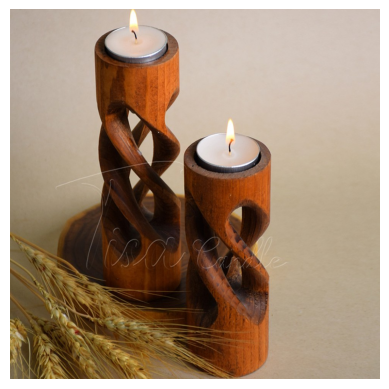

In [47]:
image_urls = ['https://image.torob.com/base/images/KE/w-/KEw-BMGHp0UcnUrP.jpg',
              "https://image.torob.com/base/images/7i/p6/7ip6Yt4qrJWb_ra8.jpg",
              'https://image.torob.com/base/images/jd/W6/jdW63jxVXQDuO6V6.jpg',
            ]
image_url = image_urls[0]
text_input = "یک کالا مشابه تصویر پیدا کن."
text_input = "شیء و مفهوم اصلی در تصویر چیست؟"
image = get_base64_encoded_image(image_url)
visualize_iamge(image)

In [52]:
print(request_chat(x=text_input, image_url=image_urls[0]))

{'message': 'جا شمعی چوبی دکوری', 'base_random_keys': ['woidlu'], 'member_random_keys': None}


In [97]:
from pydantic_ai import Agent, BinaryContent
# Decode base64 for BinaryContent
image_bytes, media_type = extract_media_type_and_bytes(image)

# Run the agent synchronously with text + image
result = await image_agent.run(
    [
        text_input,
        BinaryContent(data=image_bytes, media_type=media_type),
    ]
)

# Print structured output
print("Agent output:", result.output)

NameError: name 'image_agent' is not defined

In [126]:
print(result.output.main_topic)

پیراهن آستین بلند


In [65]:
with open("../categories_by_level.pkl", "rb") as f:
    loaded_levels = pickle.load(f)
labels_quotes = [f"Level {lvl}: {cats}" "\n" for lvl, cats in loaded_levels.items()]

In [66]:
labels_quotes

["Level 1: ['لوازم خانگی']\n",
 "Level 2: ['لوازم آشپزخانه', 'دکوراسیون منزل', 'تلویزیون و لوازم جانبی', 'یخچال، فریزر و آب سردکن', 'شستشو و نظافت', 'اتاق خواب', 'ست جهیزیه', 'مبلمان و صنایع چوب', 'تهویه، سرمایش و گرمایش', 'لوازم دوخت و دوز', 'حمام و دستشویی']\n",
 "Level 3: ['وسایل پلاستیکی و یکبار مصرف', 'منسوجات آشپزخانه', 'اجاق و لوازم پخت و پز', 'لوازم برقی پخت و پز', 'ظروف پخت و پز', 'ظروف سرو و پذیرایی', 'نوشیدنی\\u200c ساز', 'ابزار آشپزخانه', 'وسایل کاربردی آشپزخانه', 'لوازم قنادی', 'لوازم یدکی آشپزخانه', 'تعمیرات لوازم خانگی', 'سایر لوازم آشپزخانه و پخت و پز', 'فرش', 'لوستر و چراغ تزئینی', 'ظروف تزئینی', 'گلدان و گل مصنوعی', 'کاغذ دیواری', 'شمع و جاشمعی', 'آینه دکوراتیو', 'تابلو و مجسمه', 'تابلو فرش', 'رومیزی و پرده', 'اشیاء قدیمی و کلکسیونی', 'ساعت دیواری٬ رومیزی و تزئینی', 'گل و گیاه طبیعی', 'استند و پایه گلدان', 'لوازم تزئینی منزل', 'کاپ و تندیس', 'جای ریموت کنترل', 'قاب و شاسی عکس', 'طلق رومیزی', 'تلویزیون', 'کابل و آنتن تلویزیون', 'گیرنده دیجیتال', 'سایر لوازم جانبی تلویز

In [26]:
import os, sys
sys.path.append(os.path.abspath(".."))
from pydantic import BaseModel
from pydantic_ai import Agent, UsageLimits, ModelSettings
from pydantic_ai.models.openai import OpenAIChatModel
from pydantic_ai.providers.openai import OpenAIProvider
from prompt.prompts import *

import httpx
OPENAI_API_KEY = os.getenv("API_KEY")
BASE_URL = os.getenv("BASE_URL")  # e.g. https://turbo.torob.com/v1
MODEL = os.getenv("SHOPPING_MODEL")


# --- Output Schema ---
class ClassifierResponse(BaseModel):
    scenario: str = None

# --- Agent ---

client = OpenAIChatModel(
    MODEL,
    provider=OpenAIProvider(
        base_url=BASE_URL,
        api_key=OPENAI_API_KEY,
        http_client=httpx.AsyncClient()
    ),
    settings=ModelSettings(temperature=0.0001, max_tokens=1024)
)

agent = Agent(
    name="TorobClassifierAssistant",
    model=client,
    system_prompt=input_classification_sys_prompt,
    output_type=ClassifierResponse,
)

In [11]:
for instruction in instructions:
    result = await agent.run(instruction)
    print(str(result.output) + " -> " + instruction)

scenario='PRODUCT_SEARCH' -> میتونی دراور چهار کشو (کد D14) رو بهم کمک کنی پیدا کنم؟
scenario='NUMERIC_VALUE' -> کمترین قیمت ست سطل و جای دستمال لالیپاپ مدل رنگین کمان چنده؟
scenario='PRODUCT_SEARCH' -> لطفاً دراور چهار کشو (کد D14) را برای من تهیه کنید.
scenario='PRODUCT_FEATURE' -> عرض پارچه تریکو جودون 1/30 لاکرا گردباف نوریس به رنگ زرد طلایی چقدر است؟
scenario='NUMERIC_VALUE' -> کمترین قیمت در این پایه برای گیاه طبیعی بلک گلد بنسای نارگل کد ۰۱۰۸ چقدر است؟
scenario='PRODUCTS_COMPARE' -> کدام یک از این ماگ‌های خرید ماگ-لیوان هندوانه فانتزی و کارتونی کد 1375 یا ماگ لته خوری سرامیکی با زیره کد 741 دارای سبک کارتونی و فانتزی بوده و برای کودکان یا نوجوانان مناسب‌تر است؟
scenario='NUMERIC_VALUE' -> قیمت متوسط خردکن سیلور کرست مدل NF-1923 تیغه تیتانیومی در شهر قم چقدر است؟
scenario='PRODUCTS_COMPARE' -> محصول 'لحاف کرسی دست دوز ترمه طرح نسترن رنگ زرشکی' با شناسه "iushix" و 'لحاف کرسی دست دوز ترمه آبی طرح نسترن کد 119807 Lahaf' از نظر در دسترس بودن گارانتی در شهرهای مختلف را مقایسه کنید. کد